In [26]:
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import bartlett
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, anderson, kstest,jarque_bera, normaltest , levene,bartlett


In [27]:
df = pd.read_csv("./data/전처리완료/코스닥_train_std.csv", index_col=0)
test = pd.read_csv("./data/전처리완료/코스닥_test_std.csv", index_col=0)
# pd.reset_option("display.max.rows", None)
df["거래소코드"] = df["거래소코드"].astype("object")
df["회계년도"] = df["회계년도"].astype("object")


df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4331 entries, 0 to 4330
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   차입금의존도        4331 non-null   float64
 1   부채비율          4331 non-null   float64
 2   순운전자본비율       4331 non-null   float64
 3   총자본정상영업이익률    4331 non-null   float64
 4   자기자본순이익률      4331 non-null   float64
 5   총자본순이익률       4331 non-null   float64
 6   매출액총이익률       4331 non-null   float64
 7   금융비용부담률       4331 non-null   float64
 8   자본금회전률        4331 non-null   float64
 9   유형자산회전율       4331 non-null   float64
 10  자기자본회전률       4331 non-null   float64
 11  타인자본회전률       4331 non-null   float64
 12  총자본회전률        4331 non-null   float64
 13  합계_기말인원(명)    4331 non-null   float64
 14  대주주지분율        4331 non-null   float64
 15  유형자산증가율       4331 non-null   float64
 16  매출액증가율        4331 non-null   float64
 17  자기자본증가율       4331 non-null   float64
 18  총자본증가율        4331 non-null   flo

In [28]:
df.columns

Index(['차입금의존도', '부채비율', '순운전자본비율', '총자본정상영업이익률', '자기자본순이익률', '총자본순이익률',
       '매출액총이익률', '금융비용부담률', '자본금회전률', '유형자산회전율', '자기자본회전률', '타인자본회전률',
       '총자본회전률', '합계_기말인원(명)', '대주주지분율', '유형자산증가율', '매출액증가율', '자기자본증가율',
       '총자본증가율', '정상영업이익증가율', '누적수익성비율', '현금흐름 대 자산', '현금흐름 대 매출액', 'TMD',
       '시총/총자산', 'EBIT/총자산', '당기전기영업손익', '당기전기매출액', '당기전기영업손익/매출액', 'FINDEP',
       'PBR변화율', 'EBITDA마진율', 'CND', 'WW지수', 'WWC변수', 'MK지수', 'SA지수',
       '매출액증가율차분', 'target_1', 'target_2', 'target_3', '회사명', '거래소코드', '회계년도',
       '산업군'],
      dtype='object')

In [29]:
# 정상
pd.set_option('display.max_columns',None)
df[df['target_3']==0].describe()

,차입금의존도,부채비율,순운전자본비율,총자본정상영업이익률,자기자본순이익률,총자본순이익률,매출액총이익률,금융비용부담률,자본금회전률,유형자산회전율,자기자본회전률,타인자본회전률,총자본회전률,합계_기말인원(명),대주주지분율,유형자산증가율,매출액증가율,자기자본증가율,총자본증가율,정상영업이익증가율,누적수익성비율,현금흐름 대 자산,현금흐름 대 매출액,TMD,시총/총자산,EBIT/총자산,당기전기영업손익,당기전기매출액,당기전기영업손익/매출액,FINDEP,PBR변화율,EBITDA마진율,CND,WW지수,WWC변수,MK지수,SA지수,매출액증가율차분,target_1,target_2,target_3
count,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.0,4166.0,4166.0
mean,-0.046074,-0.027426,0.050046,0.079480,0.052936,0.101608,0.037702,-0.068506,0.023736,-0.001504,-0.005704,0.035951,0.027969,0.007760,0.036730,-0.011819,0.022948,0.034052,0.031515,0.028645,0.089056,0.057318,0.071896,-0.054854,-0.012200,0.090981,0.047817,0.009180,0.084167,-0.014149,-0.017433,0.085328,-0.081023,-0.053499,-0.021145,-0.056338,0.014037,0.023443,0.0,0.0,0.0
std,0.783847,0.069347,0.723579,0.873237,0.161746,0.651806,0.925427,0.478339,1.004993,0.999508,0.885277,0.993523,0.988223,0.885213,0.976386,0.565087,0.923144,0.509621,0.901536,0.940175,0.624621,0.838087,0.569682,0.592580,0.833899,0.480192,0.943269,0.981971,0.796440,0.911821,0.066929,0.673730,0.286237,0.957116,1.013953,0.951862,1.001983,0.930625,0.0,0.0,0.0
min,-1.111032,-0.107624,-1.783106,-3.988728,-1.133942,-3.495322,-1.916818,-1.677787,-0.933839,-0.435666,-1.225724,-1.412551,-1.800889,-0.960361,-1.933356,-1.075194,-2.338172,-1.407595,-2.144935,-9.602824,-3.483030,-3.373788,-6.227825,-0.584032,-0.867006,-2.665151,-2.119924,-0.803789,-10.251674,-5.416232,-0.121172,-7.544655,-0.315407,-2.808629,-8.545019,-2.809337,-1.904842,-2.501229,0.0,0.0,0.0
25%,-0.745914,-0.079927,-0.485873,-0.329015,0.014248,-0.126536,-0.619205,-0.301516,-0.615565,-0.344366,-0.652399,-0.704790,-0.689408,-0.555416,-0.721804,-0.210066,-0.471699,-0.190222,-0.449619,-0.157998,-0.196187,-0.445183,-0.179220,-0.440310,-0.523278,-0.098308,-0.451424,-0.552497,-0.167246,-0.337775,-0.058754,-0.210261,-0.248885,-0.730121,-0.167346,-0.737869,-0.747922,-0.478940,0.0,0.0,0.0
50%,-0.120726,-0.045772,0.061343,0.065682,0.082740,0.178501,-0.172525,-0.148597,-0.284204,-0.271325,-0.265218,-0.224744,-0.145009,-0.253860,0.002923,-0.143706,-0.098032,-0.035521,-0.115802,0.028762,0.153047,0.086087,0.095448,-0.256414,-0.263718,0.133938,-0.191466,-0.305692,0.106328,-0.025555,-0.032015,0.041824,-0.162570,-0.125777,0.421565,-0.142048,-0.168544,-0.071198,0.0,0.0,0.0
75%,0.567118,0.006249,0.571634,0.575349,0.140875,0.482911,0.521131,0.072286,0.301043,-0.115169,0.419794,0.519943,0.580857,0.266322,0.742398,0.012516,0.310444,0.166913,0.320043,0.241641,0.493477,0.583394,0.387536,0.089295,0.199678,0.369039,0.265617,0.165649,0.466600,0.308730,0.004499,0.426626,-0.021712,0.682387,0.536095,0.690621,0.637994,0.352223,0.0,0.0,0.0
max,1.966053,0.423051,1.895923,2.840027,0.494706,1.801741,3.303333,4.841902,6.386465,10.162142,4.663889,3.947964,3.983351,5.691082,2.382596,6.811705,7.046408,4.425119,7.189836,5.785504,1.235490,2.491670,2.003689,3.948537,6.252129,1.360746,7.953184,8.034592,2.333558,4.725001,0.371621,2.236519,3.242570,2.392454,0.536096,2.355321,3.419402,6.851614,0.0,0.0,0.0


In [30]:
# 부실
df[df['target_3']==1].describe()

,차입금의존도,부채비율,순운전자본비율,총자본정상영업이익률,자기자본순이익률,총자본순이익률,매출액총이익률,금융비용부담률,자본금회전률,유형자산회전율,자기자본회전률,타인자본회전률,총자본회전률,합계_기말인원(명),대주주지분율,유형자산증가율,매출액증가율,자기자본증가율,총자본증가율,정상영업이익증가율,누적수익성비율,현금흐름 대 자산,현금흐름 대 매출액,TMD,시총/총자산,EBIT/총자산,당기전기영업손익,당기전기매출액,당기전기영업손익/매출액,FINDEP,PBR변화율,EBITDA마진율,CND,WW지수,WWC변수,MK지수,SA지수,매출액증가율차분,target_1,target_2,target_3
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,165.0,165.0
mean,1.163293,0.692454,-1.263579,-2.006754,-1.336561,-2.565449,-0.951916,1.729666,-0.599309,0.037968,0.144029,-0.907700,-0.706180,-0.195925,-0.927365,0.298408,-0.579403,-0.859750,-0.795696,-0.723247,-2.248528,-1.447201,-1.815277,1.384968,0.308022,-2.297136,-1.207312,-0.231790,-2.125082,0.357242,0.440147,-2.154403,2.045710,1.350767,0.533875,1.422443,-0.354402,-0.591892,1.0,1.0,1.0
std,3.064179,5.077882,3.382586,1.682452,4.886271,2.955499,1.926384,4.179526,0.618287,1.017671,2.546241,0.691608,1.041749,2.543180,1.139278,4.266821,2.101141,4.363444,2.259429,1.847389,3.348427,2.525823,3.836646,3.935012,2.940917,3.877274,1.512418,1.365097,2.361299,2.271579,5.108047,3.166404,4.466606,1.111427,0.020121,1.132306,0.883174,2.011789,0.0,0.0,0.0
min,-1.111032,-0.114043,-41.509312,-10.109975,-56.559021,-24.174275,-13.891710,-3.391451,-0.950590,-0.445741,-1.322519,-1.572566,-1.959672,-1.016364,-2.328131,-1.370660,-3.475585,-26.573496,-4.396642,-13.712679,-29.202112,-21.259654,-34.257668,-0.592314,-0.951527,-29.704326,-13.461283,-0.817964,-15.630315,-18.666590,-14.098627,-21.667143,-0.317245,-1.993825,0.344265,-2.033213,-1.912754,-3.548493,1.0,1.0,1.0
25%,-0.012570,-0.064886,-1.688696,-2.806929,-1.117500,-3.618257,-1.494988,0.205786,-0.914470,-0.389701,-0.898110,-1.270999,-1.347223,-0.887126,-1.718790,-0.576630,-1.625056,-1.713790,-2.064259,-0.945838,-2.425832,-2.187254,-2.022553,-0.333019,-0.706347,-2.607996,-1.258721,-0.736056,-3.019027,0.053243,-0.086617,-2.489993,0.050794,0.653251,0.536095,0.751455,-0.935571,-1.675361,1.0,1.0,1.0
50%,0.945165,0.054134,-0.996575,-1.777112,-0.554936,-1.817724,-0.823453,0.754353,-0.819721,-0.316031,-0.488592,-1.086366,-0.961607,-0.753580,-1.196312,-0.254041,-0.920808,-0.817670,-1.159105,-0.064022,-1.405206,-1.163596,-0.718813,0.119059,-0.340882,-1.156160,-0.921032,-0.663115,-1.560061,0.269460,-0.011623,-1.269404,0.686287,1.331371,0.536095,1.385039,-0.533436,-0.874823,1.0,1.0,1.0
75%,1.704491,0.263176,-0.246559,-0.861284,-0.145371,-0.844282,-0.162222,2.108778,-0.627081,-0.121466,0.174083,-0.778644,-0.394525,-0.387406,-0.457324,-0.078017,-0.161154,-0.004860,-0.153130,0.163449,-0.638879,-0.431474,-0.141368,1.536525,0.292185,-0.493323,-0.661648,-0.357787,-0.659405,0.587579,0.104573,-0.520565,1.762651,1.992456,0.536095,2.032418,0.072478,-0.228160,1.0,1.0,1.0
max,36.154117,64.010382,2.044281,2.125969,1.050757,2.586181,3.728800,44.484333,2.896443,6.860835,25.608873,3.197123,5.140199,22.211991,4.086806,39.265011,13.621171,31.517164,15.551877,2.471730,0.977099,12.523412,1.982339,32.674710,32.696911,2.625775,1.156724,9.928329,2.040269,15.604513,63.080311,1.679135,32.790239,6.388175,0.536098,6.270807,2.717447,13.464451,1.0,1.0,1.0


In [31]:
df_y = df[["target_1", "target_2", "target_3"]]
df_obj = df.select_dtypes("object")
col_int = df.select_dtypes("float").columns.to_list()

In [32]:
# 정규성 검정을 하나의 함수로
def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])

In [33]:
normal_test("kstest",df[col_int])

(Empty DataFrame
 Columns: [normal]
 Index: [],
        notnormal
 0         차입금의존도
 1           부채비율
 2        순운전자본비율
 3     총자본정상영업이익률
 4       자기자본순이익률
 5        총자본순이익률
 6        매출액총이익률
 7        금융비용부담률
 8         자본금회전률
 9        유형자산회전율
 10       자기자본회전률
 11       타인자본회전률
 12        총자본회전률
 13    합계_기말인원(명)
 14        대주주지분율
 15       유형자산증가율
 16        매출액증가율
 17       자기자본증가율
 18        총자본증가율
 19     정상영업이익증가율
 20       누적수익성비율
 21     현금흐름 대 자산
 22    현금흐름 대 매출액
 23           TMD
 24        시총/총자산
 25      EBIT/총자산
 26      당기전기영업손익
 27       당기전기매출액
 28  당기전기영업손익/매출액
 29        FINDEP
 30        PBR변화율
 31     EBITDA마진율
 32           CND
 33          WW지수
 34         WWC변수
 35          MK지수
 36          SA지수
 37      매출액증가율차분)

In [34]:
normal_test("shapiro",df[col_int])

(Empty DataFrame
 Columns: [normal]
 Index: [],
        notnormal
 0         차입금의존도
 1           부채비율
 2        순운전자본비율
 3     총자본정상영업이익률
 4       자기자본순이익률
 5        총자본순이익률
 6        매출액총이익률
 7        금융비용부담률
 8         자본금회전률
 9        유형자산회전율
 10       자기자본회전률
 11       타인자본회전률
 12        총자본회전률
 13    합계_기말인원(명)
 14        대주주지분율
 15       유형자산증가율
 16        매출액증가율
 17       자기자본증가율
 18        총자본증가율
 19     정상영업이익증가율
 20       누적수익성비율
 21     현금흐름 대 자산
 22    현금흐름 대 매출액
 23           TMD
 24        시총/총자산
 25      EBIT/총자산
 26      당기전기영업손익
 27       당기전기매출액
 28  당기전기영업손익/매출액
 29        FINDEP
 30        PBR변화율
 31     EBITDA마진율
 32           CND
 33          WW지수
 34         WWC변수
 35          MK지수
 36          SA지수
 37      매출액증가율차분)

In [35]:
def homoscedasticity_test(df, col,tool):
        dict = {"변수" : [], "p_val" : [], "T" : [] }           
        if tool == "levene":
                
                for i in col:
                        T, p_val =levene(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict["변수"].append(i)
                        dict["p_val"].append(p_val)
                        dict["T"].append(T)

                        list = pd.DataFrame(dict)

        if tool == "bartlett":
                for i in col:
                        T, p_val =bartlett(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict["변수"].append(i)
                        dict["p_val"].append(p_val)
                        dict["T"].append(T)

                        list = pd.DataFrame(dict)
        return list


In [36]:
bartlett_결과 = homoscedasticity_test(df,col_int,"bartlett")
bartlett_등분산 = bartlett_결과[bartlett_결과["p_val"]>0.05]
bartlett등분산변수 = bartlett_등분산.loc[:,"변수"].to_list()
bartlett등분산변수

['유형자산회전율', '총자본회전률']

In [37]:
levene_결과 = homoscedasticity_test(df,col_int,"levene")
levene_등분산 = levene_결과[levene_결과["p_val"]>0.05]


levene등분산변수 = levene_등분산.loc[:,"변수"].to_list()


등분산변수target = levene등분산변수+ ["target_3"]

In [38]:
levene_비등분산 = levene_결과[levene_결과["p_val"]<0.05]
levene_비등분산target = levene_비등분산.loc[:,"변수"].to_list() + ["target_3"]

In [39]:
import scipy.stats as stats

def t_test(df,col,tool,alpha=0.05):
    dict_1 = {'변수':[],'p_val':[],'t-val':[]}
    dict_2 = {'변수':[],'p_val':[],'t-val':[]}
    if tool == 'student':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i])
            dict_1["변수"].append(i)
            dict_1["p_val"].append(p_value)
            dict_1["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_1)
        return list

    if tool == 'welch':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i],equal_var=False)
            dict_2["변수"].append(i)
            dict_2["p_val"].append(p_value)
            dict_2["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_2)
        return list

In [40]:
이분산 = t_test(df[levene_비등분산target],levene_비등분산target,"welch",alpha=0.05)
이분산t = 이분산[이분산["p_val"]<0.05]
이분산t


C:\Users\leeju\AppData\Local\Temp\ipykernel_4132\2458501125.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i],equal_var=False)


,변수,p_val,t-val
0,차입금의존도,1.093287e-06,5.063184
2,순운전자본비율,1.565883e-06,-4.983920
3,총자본정상영업이익률,3.886137e-35,-15.843744
4,자기자본순이익률,3.487722e-04,-3.652689
5,총자본순이익률,4.594717e-23,-11.580452
6,매출액총이익률,6.163257e-10,-6.568873
7,금융비용부담률,1.268984e-07,5.525015
8,자본금회전률,2.620151e-26,-12.315730
10,타인자본회전률,1.071414e-39,-16.851302
12,매출액증가율,3.280915e-04,-3.668449


In [41]:
등분산 = t_test(df[등분산변수target],등분산변수target,"student",alpha=0.05)
등분산t = 등분산[등분산["p_val"]<0.05]
등분산t

C:\Users\leeju\AppData\Local\Temp\ipykernel_4132\2458501125.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i])


,변수,p_val,t-val
1,총자본회전률,1.508275e-20,-9.339489
2,합계_기말인원(명),1.027908e-02,-2.567421
3,대주주지분율,1.728816e-34,-12.355268
4,당기전기영업손익,6.362814e-58,-16.285766
5,당기전기매출액,2.393254e-03,-3.038314
6,WW지수,1.388295e-72,18.363041
7,MK지수,1.285848e-80,19.420009
8,target_3,0.000000e+00,inf


In [42]:
등분산_col = 등분산t.loc[:, "변수"].to_list()
이분산_col = 이분산t.loc[:, "변수"].to_list()
의미있는_col = 이분산_col + 등분산_col

In [43]:
df_1 = df[의미있는_col]
df_1.drop(columns="target_3", axis=1, inplace=True)

C:\Users\leeju\AppData\Local\Temp\ipykernel_4132\687291390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns="target_3", axis=1, inplace=True)


In [44]:
# VIF 출력을 위한 데이터 프레임 형성
pd.set_option("display.max.rows", None)
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
vif["features"] = df_1.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,2154.643349,MK지수
1,2109.931813,WW지수
2,8.960183,차입금의존도
3,8.305994,총자본순이익률
4,8.049827,매출액증가율차분
5,7.800902,매출액증가율
6,7.588682,EBIT/총자산
7,7.174827,총자본정상영업이익률
8,4.499589,순운전자본비율
9,4.499481,EBITDA마진율


In [45]:
drop_col = ["MK지수"]

In [46]:
df_1.drop(columns=drop_col, axis=1 , inplace=True)

# VIF 출력을 위한 데이터 프레임 형성
pd.set_option("display.max.rows", None)
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
vif["features"] = df_1.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

C:\Users\leeju\AppData\Local\Temp\ipykernel_4132\700429214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns=drop_col, axis=1 , inplace=True)


,VIF Factor,features
0,8.301713,총자본순이익률
1,8.049793,매출액증가율차분
2,7.798822,매출액증가율
3,7.582195,EBIT/총자산
4,7.166606,총자본정상영업이익률
5,4.479324,EBITDA마진율
6,4.157026,당기전기영업손익/매출액
7,4.120207,WW지수
8,3.965593,차입금의존도
9,3.859489,순운전자본비율


In [47]:
통계적유의_col = vif["features"].to_list() 
df_vif = pd.concat([df_obj ,df_1[통계적유의_col], df_y], axis=1)
df_vif.to_csv("./data/통계검증완료/코스닥_standard_train.csv", encoding="utf-8-sig")
test[df_vif.columns].to_csv("./data/통계검증완료/코스닥_standard_test.csv", encoding="utf-8-sig")

In [48]:
비교 =  test.columns
전체 = df_vif.columns


def find_difference(list1, list2):
    difference = []
    for item in list1:
        if item not in list2:
            difference.append(item)
    return difference

find_difference(전체,비교)


[]

C:\Users\leeju\AppData\Local\Temp\ipykernel_4132\2489820295.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<Axes: title={'center': 'Correlation of Features'}>

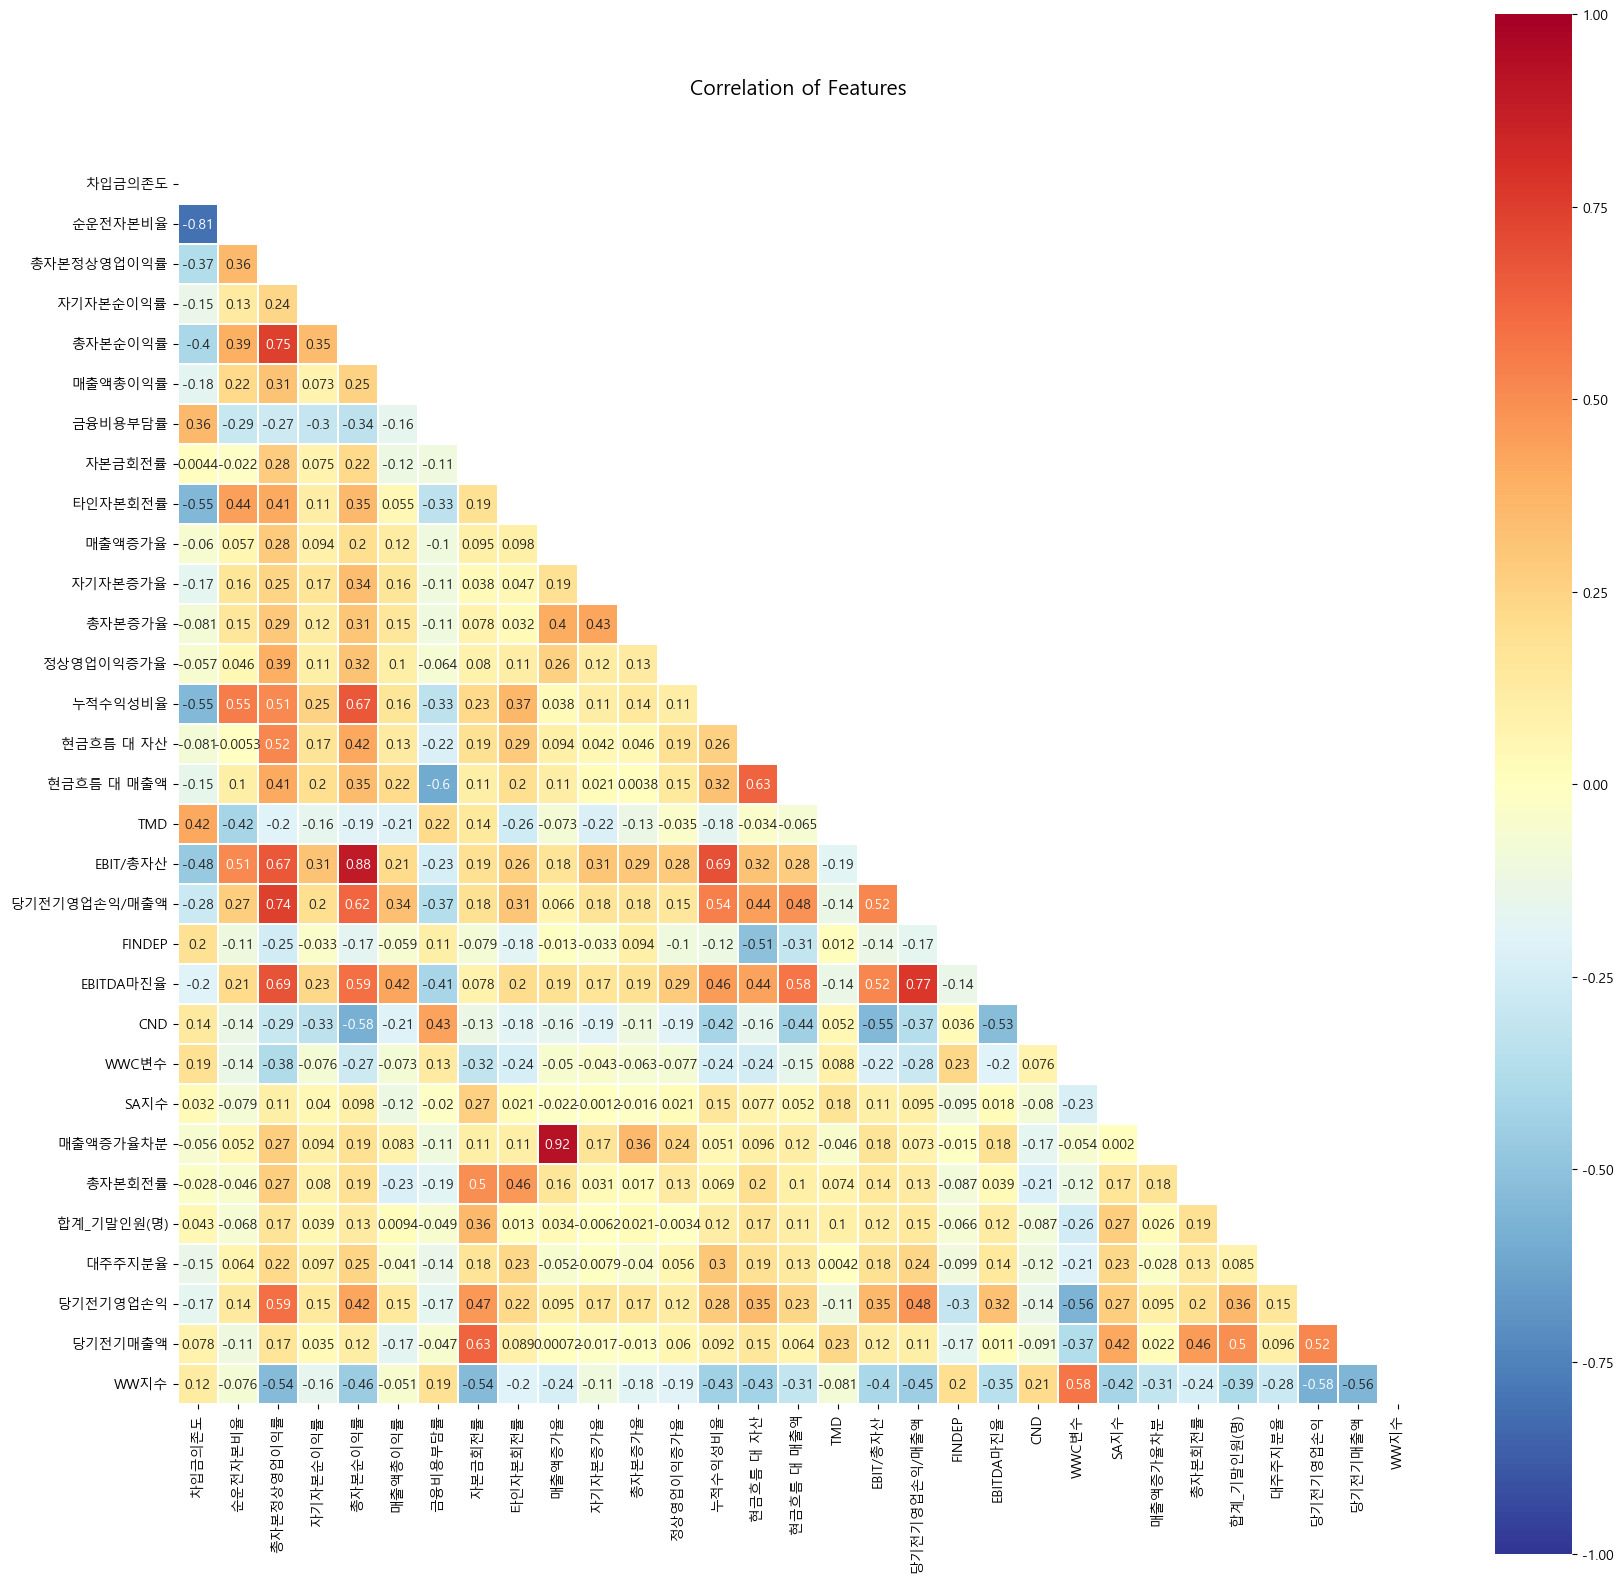

In [50]:
colormap = plt.cm.hot

corr = df_1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(20, 20))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family="Malgun Gothic")
plt.title("Correlation of Features", y=1.05, size=15)
sns.heatmap(corr,  linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,mask=mask,
            cmap='RdYlBu_r', linecolor="white", annot=True, annot_kws={'size': 10})